In [1]:
import batoid
import os
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
LSSTr_fn = os.path.join(batoid.datadir, "lsst", "LSST_r.yaml")
fiducial_telescope = batoid.Telescope.makeFromYAML(LSSTr_fn)

In [3]:
print(fiducial_telescope.surfaces.keys())

odict_keys(['M1', 'M2', 'M3', 'L1', 'L1E', 'L2', 'L2E', 'F', 'FE', 'L3', 'L3E', 'D'])


In [4]:
def perturb(cam_dz=0):
    telescope = fiducial_telescope
    if not (cam_dz == 0):
        for elt in ['L1', 'L1E', 'L2', 'L2E', 'F', 'FE', 'L3', 'L3E', 'D']:
            telescope = telescope.withShift(elt, 0, 0, cam_dz)
    return telescope

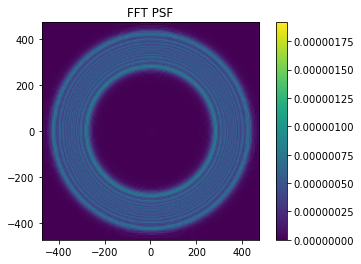

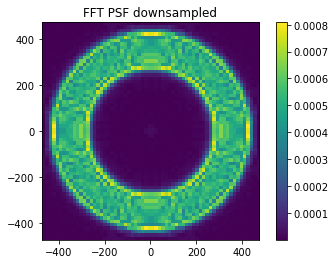

In [5]:
cam_dz = 1000e-6
theta_y = 0*3600/206265

telescope = perturb(cam_dz=cam_dz)

scale, fftpsf = telescope.fftPSF(0, theta_y, wavelength=750e-9, nx=1024, pad_factor=2)
extent = scale*fftpsf.shape[0]/2*np.r_[-1., 1., -1., 1.] # radians
extent -= scale/2
extent *= 206265 # arcsec
extent /= 0.2 # pixels
extent *= 10 # microns
plt.imshow(fftpsf/fftpsf.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF")
plt.show()

fftpsf_sub = fftpsf[16::32, 16::32]
plt.imshow(fftpsf_sub/fftpsf_sub.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF downsampled")
plt.show()

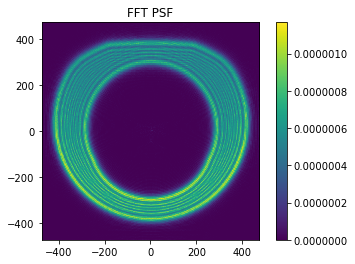

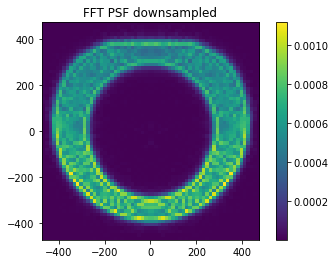

In [6]:
cam_dz = 1000e-6
theta_y = 1.75*3600/206265

telescope = perturb(cam_dz=cam_dz)

scale, fftpsf = telescope.fftPSF(0, theta_y, wavelength=750e-9, nx=1024, pad_factor=2)
extent = scale*fftpsf.shape[0]/2*np.r_[-1., 1., -1., 1.] # radians
extent -= scale/2
extent *= 206265 # arcsec
extent /= 0.2 # pixels
extent *= 10 # microns
plt.imshow(fftpsf/fftpsf.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF")
plt.show()

fftpsf_sub = fftpsf[16::32, 16::32]
plt.imshow(fftpsf_sub/fftpsf_sub.sum(), extent=extent)
plt.colorbar()
plt.title("FFT PSF downsampled")
plt.show()

In [7]:
xmin = extent[0]*1e-6
xmax = extent[1]*1e-6
xs = np.linspace(xmin, xmax, 32)
xs, ys = np.meshgrid(xs, xs)
zs = np.empty_like(xs)
zs.fill(fiducial_telescope.surfaces['D']['surface'].B+cam_dz)
rays = batoid.parallelRays(
    z=10, outer=4.1, inner=0, theta_x=0, theta_y=theta_y, wavelength=750e-9)
traced_rays = telescope.trace(rays)
traced_rays = batoid.RayVector([r for r in traced_rays if not r.isVignetted])
print(len(traced_rays))

894


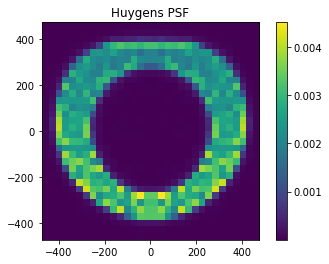

In [8]:
xs += np.mean(traced_rays.x)
ys += np.mean(traced_rays.y)
huygenspsf = telescope.huygensPSF(xs, ys, zs=zs, theta_y=theta_y, wavelength=750e-9, 
                                  nradii=500, naz=5000)
plt.imshow(huygenspsf/huygenspsf.sum(), extent=extent)
plt.colorbar()
plt.title("Huygens PSF")
plt.show()